<a href="https://colab.research.google.com/github/saipragna25/deep-learning-vision-classifiers-assignment/blob/main/DL_Vision_Classifier_Part2_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Augmentation

170498071/170498071 [==============================] - 4s 0us/step


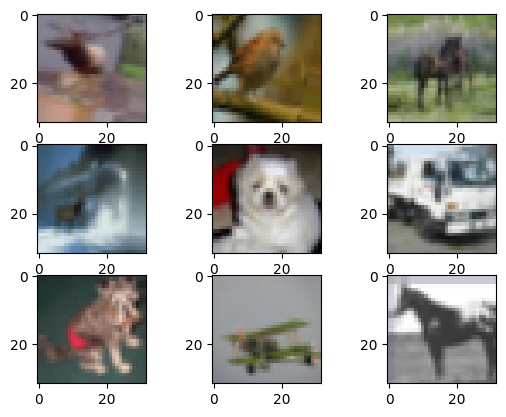

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
)

# fit parameters from data
datagen.fit(x_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i], interpolation='none')
    # show the plot
    plt.show()
    break


BiT

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# BiT model URL
bit_url = "https://tfhub.dev/google/bit/m-r50x1/1"
bit = hub.KerasLayer(bit_url, input_shape=(32, 32, 3), trainable=False)  # We keep the BiT model frozen

model_bit = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.experimental.preprocessing.Rescaling(1./255),
    bit,
    layers.Dense(10, activation='softmax')
])

model_bit.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_bit.fit(x_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 529s 325ms/step - loss: 1.9241 - accuracy: 0.5166
Epoch 2/5
1563/1563 [==============================] - 499s 319ms/step - loss: 1.4763 - accuracy: 0.5866
Epoch 3/5
1563/1563 [==============================] - 495s 316ms/step - loss: 1.4133 - accuracy: 0.6015
Epoch 4/5
1416/1563 [==========================>...] - ETA: 47s - loss: 1.3785 - accuracy: 0.6146

MLP-Mixer

In [ ]:
from mlp_mixer_keras import MlpMixerModel
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

model = MlpMixerModel(input_shape=x_train.shape[1:],
                      num_classes=len(np.unique(y_train)), 
                      num_blocks=4, 
                      patch_size=8,
                      hidden_dim=32, 
                      tokens_mlp_dim=64,
                      channels_mlp_dim=128,
                      use_softmax=True)

model.compile(loss='sparse_categorical_crossentropy', metrics='acc')
model.fit(x_train, y_train, validation_data=(x_test, y_test))
